In [1]:
!pip install torchvision
!pip install pytorch-lightning

In [4]:
import os
import os.path as op
import shutil
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import sklearn

from torchvision import datasets, models, transforms
import torchvision.transforms as T
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [5]:
import torch
import torch.nn as nn
from tqdm.auto import tqdm
import torch.nn.functional as F
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

In [6]:
train_transform = T.Compose([
    T.Resize((224,224)),
    T.RandomHorizontalFlip(p=0.2),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])
val_transform = T.Compose([
    T.Resize((224,224)),
    T.ToTensor(),
    T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225),)
])

In [7]:
train_data = datasets.ImageFolder(r"D:\Dataset\train", transform=train_transform)
val_data = datasets.ImageFolder(r"D:\Dataset\val", transform=val_transform)

In [9]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

In [10]:
n_train = len(train_loader.dataset)
n_val = len(val_loader.dataset)

In [11]:
n_train,n_val

(7517, 1614)

In [12]:
images, labels = next(iter(train_loader))

In [13]:
images.shape, labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

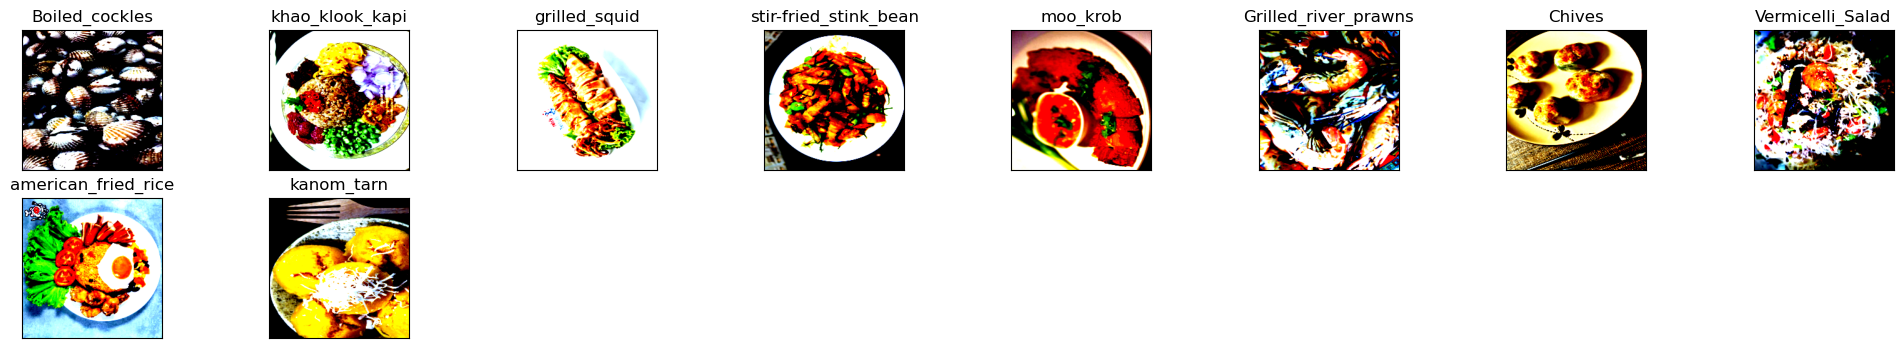

In [11]:
idx2_class = {v: k for k, v in train_data.class_to_idx.items()}
fig = plt.figure(figsize=(25, 4))
for i in range(10):
    image = np.transpose(images.cpu()[i])
    label = idx2_class[labels.cpu().tolist()[i]]
    ax = fig.add_subplot(2, 8, i + 1, xticks=[], yticks=[])
    plt.imshow(image)
    ax.set_title(label)

In [14]:
model = models.resnet34(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

C:\Users\ADMIN\anaconda3\envs\tf_gpu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\ADMIN\anaconda3\envs\tf_gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [15]:
model.fc = nn.Linear(in_features=512, out_features=len(train_data.classes))

In [16]:
cross_entropy = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=2e-3)

In [17]:
gpu = torch.cuda.is_available()
print(gpu)
if gpu:
    model.cuda()

True


100%|██████████| 51/51 [00:35<00:00,  1.45it/s]


Epoch: 1, Training loss = 3.945274854603958, Validation loss = 3.7734118893539446


100%|██████████| 51/51 [00:34<00:00,  1.47it/s]


Epoch: 2, Training loss = 3.6586961898458625, Validation loss = 3.526583228708052


100%|██████████| 51/51 [00:35<00:00,  1.42it/s]


Epoch: 3, Training loss = 3.420173686442262, Validation loss = 3.300555940306615


100%|██████████| 51/51 [00:36<00:00,  1.40it/s]


Epoch: 4, Training loss = 3.210325462443565, Validation loss = 3.102886572794105


100%|██████████| 51/51 [00:34<00:00,  1.46it/s]


Epoch: 5, Training loss = 3.0150164830901924, Validation loss = 2.927437644022548


100%|██████████| 51/51 [00:34<00:00,  1.47it/s]


Epoch: 6, Training loss = 2.8464122529008913, Validation loss = 2.765186466101229


100%|██████████| 51/51 [00:34<00:00,  1.46it/s]


Epoch: 7, Training loss = 2.6933687173481298, Validation loss = 2.6352219755912505


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 8, Training loss = 2.558843583395875, Validation loss = 2.510012634624779


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 9, Training loss = 2.442367486819254, Validation loss = 2.4102270866119877


100%|██████████| 51/51 [00:34<00:00,  1.47it/s]


Epoch: 10, Training loss = 2.3355106594113098, Validation loss = 2.3234807724107744


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 11, Training loss = 2.245459449248411, Validation loss = 2.2297859679367464


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 12, Training loss = 2.1586135141992564, Validation loss = 2.1561081409454346


100%|██████████| 51/51 [00:34<00:00,  1.47it/s]


Epoch: 13, Training loss = 2.082897176573818, Validation loss = 2.0987349900762093


100%|██████████| 51/51 [00:34<00:00,  1.47it/s]


Epoch: 14, Training loss = 2.0181822501805864, Validation loss = 2.0381369564169844


100%|██████████| 51/51 [00:35<00:00,  1.45it/s]


Epoch: 15, Training loss = 1.9553397912301647, Validation loss = 1.969155126640197


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 16, Training loss = 1.9033482399839377, Validation loss = 1.946683860327379


100%|██████████| 51/51 [00:35<00:00,  1.46it/s]


Epoch: 17, Training loss = 1.8476487798102124, Validation loss = 1.8904728248364568


100%|██████████| 51/51 [00:34<00:00,  1.48it/s]


Epoch: 18, Training loss = 1.7977136045404931, Validation loss = 1.8562220469431068


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 19, Training loss = 1.7579019021144235, Validation loss = 1.8253901179099763


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 20, Training loss = 1.7192617070410057, Validation loss = 1.7821527398947299


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 21, Training loss = 1.6814793582385694, Validation loss = 1.7445448731548872


100%|██████████| 51/51 [00:34<00:00,  1.48it/s]


Epoch: 22, Training loss = 1.6359223691773601, Validation loss = 1.7208540511988057


100%|██████████| 51/51 [00:34<00:00,  1.47it/s]


Epoch: 23, Training loss = 1.6136545886285478, Validation loss = 1.7013878162022418


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 24, Training loss = 1.5870174329712525, Validation loss = 1.672533325694012


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 25, Training loss = 1.5493025791935262, Validation loss = 1.6383539172353354


100%|██████████| 51/51 [00:34<00:00,  1.48it/s]


Epoch: 26, Training loss = 1.5288218990101117, Validation loss = 1.6185688827708455


100%|██████████| 51/51 [00:35<00:00,  1.45it/s]


Epoch: 27, Training loss = 1.5108158611245845, Validation loss = 1.6155808710549695


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 28, Training loss = 1.4757115573376849, Validation loss = 1.5914395964869483


100%|██████████| 51/51 [00:35<00:00,  1.45it/s]


Epoch: 29, Training loss = 1.4594896648956832, Validation loss = 1.5624478271016402


100%|██████████| 51/51 [00:34<00:00,  1.46it/s]


Epoch: 30, Training loss = 1.437219258348755, Validation loss = 1.5496600353732577


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 31, Training loss = 1.4197858155558714, Validation loss = 1.5426291434147397


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 32, Training loss = 1.4038071040699929, Validation loss = 1.5244287394236455


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 33, Training loss = 1.380053363329111, Validation loss = 1.500991694102943


100%|██████████| 51/51 [00:34<00:00,  1.46it/s]


Epoch: 34, Training loss = 1.3688313235179754, Validation loss = 1.4926630672173578


100%|██████████| 51/51 [00:34<00:00,  1.48it/s]


Epoch: 35, Training loss = 1.3480326565589869, Validation loss = 1.4785766741895616


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 36, Training loss = 1.3336056078687157, Validation loss = 1.472523163094692


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 37, Training loss = 1.3214747965676807, Validation loss = 1.4570066343896009


100%|██████████| 51/51 [00:34<00:00,  1.47it/s]


Epoch: 38, Training loss = 1.2998482748217859, Validation loss = 1.4442456749439831


100%|██████████| 51/51 [00:34<00:00,  1.47it/s]


Epoch: 39, Training loss = 1.2923858939641901, Validation loss = 1.451078709616537


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 40, Training loss = 1.2738743004875646, Validation loss = 1.4270653947726206


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 41, Training loss = 1.264129958064597, Validation loss = 1.4211439510260373


100%|██████████| 51/51 [00:35<00:00,  1.46it/s]


Epoch: 42, Training loss = 1.2564606997455168, Validation loss = 1.4084128200490826


100%|██████████| 51/51 [00:35<00:00,  1.45it/s]


Epoch: 43, Training loss = 1.239380472277618, Validation loss = 1.3988688998062815


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 44, Training loss = 1.2238602303310453, Validation loss = 1.397515987965845


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 45, Training loss = 1.2231830946860263, Validation loss = 1.3921795711198262


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 46, Training loss = 1.2074514500746245, Validation loss = 1.377852808144013


100%|██████████| 51/51 [00:34<00:00,  1.48it/s]


Epoch: 47, Training loss = 1.2044663438141083, Validation loss = 1.3759404231772252


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 48, Training loss = 1.1977198655195846, Validation loss = 1.3653725915977355


100%|██████████| 51/51 [00:35<00:00,  1.42it/s]


Epoch: 49, Training loss = 1.1737090254045632, Validation loss = 1.366921547915708


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 50, Training loss = 1.1717862151350067, Validation loss = 1.3557035747218458


100%|██████████| 51/51 [00:34<00:00,  1.48it/s]


Epoch: 51, Training loss = 1.1642643569456828, Validation loss = 1.3531161880552252


100%|██████████| 51/51 [00:34<00:00,  1.46it/s]


Epoch: 52, Training loss = 1.1503322718069562, Validation loss = 1.342527387162862


100%|██████████| 51/51 [00:36<00:00,  1.41it/s]


Epoch: 53, Training loss = 1.1409192101283325, Validation loss = 1.3352048054355967


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 54, Training loss = 1.1306535300857068, Validation loss = 1.3255165747402622


100%|██████████| 51/51 [00:34<00:00,  1.47it/s]


Epoch: 55, Training loss = 1.124386290769969, Validation loss = 1.3236784252535454


100%|██████████| 51/51 [00:35<00:00,  1.42it/s]


Epoch: 56, Training loss = 1.1217210518167233, Validation loss = 1.3163245179248417


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 57, Training loss = 1.1171724187799696, Validation loss = 1.3217995440058845


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 58, Training loss = 1.1133531607163147, Validation loss = 1.31378048178284


100%|██████████| 51/51 [00:38<00:00,  1.32it/s]


Epoch: 59, Training loss = 1.0939729636029802, Validation loss = 1.3047754961023248


100%|██████████| 51/51 [00:35<00:00,  1.45it/s]


Epoch: 60, Training loss = 1.0884186979048713, Validation loss = 1.2949592101086471


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 61, Training loss = 1.0867474590572759, Validation loss = 1.296324062672394


100%|██████████| 51/51 [00:35<00:00,  1.45it/s]


Epoch: 62, Training loss = 1.079700886021749, Validation loss = 1.2912800767016972


100%|██████████| 51/51 [00:34<00:00,  1.48it/s]


Epoch: 63, Training loss = 1.0767695738214023, Validation loss = 1.2917043066674745


100%|██████████| 51/51 [00:35<00:00,  1.45it/s]


Epoch: 64, Training loss = 1.0743639217628924, Validation loss = 1.288752752018093


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 65, Training loss = 1.0649173698384695, Validation loss = 1.2767978481200548


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 66, Training loss = 1.0531854301718808, Validation loss = 1.2791155600340984


100%|██████████| 51/51 [00:34<00:00,  1.48it/s]


Epoch: 67, Training loss = 1.0467217208001625, Validation loss = 1.2763703145649945


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 68, Training loss = 1.0416915743246633, Validation loss = 1.2789360258215865


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 69, Training loss = 1.0391367998737848, Validation loss = 1.26052091659371


100%|██████████| 51/51 [00:35<00:00,  1.45it/s]


Epoch: 70, Training loss = 1.038828361489536, Validation loss = 1.261160261864408


100%|██████████| 51/51 [00:34<00:00,  1.47it/s]


Epoch: 71, Training loss = 1.0225342474228623, Validation loss = 1.2632667394966588


100%|██████████| 51/51 [00:35<00:00,  1.46it/s]


Epoch: 72, Training loss = 1.027742626740924, Validation loss = 1.2640150113324398


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 73, Training loss = 1.0098573157995705, Validation loss = 1.2543590269715075


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 74, Training loss = 1.0125194122234018, Validation loss = 1.2670472675687465


100%|██████████| 51/51 [00:35<00:00,  1.45it/s]


Epoch: 75, Training loss = 1.0053593957933227, Validation loss = 1.2512142166329139


100%|██████████| 51/51 [00:34<00:00,  1.46it/s]


Epoch: 76, Training loss = 1.006001362311201, Validation loss = 1.2404775783475004


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 77, Training loss = 0.9951690786678106, Validation loss = 1.2496513884602278


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 78, Training loss = 0.9931296818399423, Validation loss = 1.2443706973039232


100%|██████████| 51/51 [00:34<00:00,  1.46it/s]


Epoch: 79, Training loss = 0.9849093130044961, Validation loss = 1.2355090162567932


100%|██████████| 51/51 [00:34<00:00,  1.46it/s]


Epoch: 80, Training loss = 0.9857952272271926, Validation loss = 1.2319481167503745


100%|██████████| 51/51 [00:35<00:00,  1.42it/s]


Epoch: 81, Training loss = 0.9792151607952648, Validation loss = 1.2409321809789948


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 82, Training loss = 0.9654208608125299, Validation loss = 1.235955600844883


100%|██████████| 51/51 [00:34<00:00,  1.46it/s]


Epoch: 83, Training loss = 0.9716638281685693, Validation loss = 1.2221406175301421


100%|██████████| 51/51 [00:34<00:00,  1.48it/s]


Epoch: 84, Training loss = 0.964822738446881, Validation loss = 1.2251283036731877


100%|██████████| 51/51 [00:35<00:00,  1.45it/s]


Epoch: 85, Training loss = 0.9586462285491052, Validation loss = 1.2171688901152014


100%|██████████| 51/51 [00:35<00:00,  1.42it/s]


Epoch: 86, Training loss = 0.9489408529263094, Validation loss = 1.2260934117410558


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 87, Training loss = 0.9532293663929479, Validation loss = 1.2166813306205777


100%|██████████| 51/51 [00:34<00:00,  1.48it/s]


Epoch: 88, Training loss = 0.952971711966908, Validation loss = 1.2094872737905793


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 89, Training loss = 0.9472839205573019, Validation loss = 1.209671998777354


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 90, Training loss = 0.9404519442089762, Validation loss = 1.2208516055618817


100%|██████████| 51/51 [00:35<00:00,  1.45it/s]


Epoch: 91, Training loss = 0.9384292004684731, Validation loss = 1.209989094379666


100%|██████████| 51/51 [00:34<00:00,  1.49it/s]


Epoch: 92, Training loss = 0.9429598113982082, Validation loss = 1.21474389811283


100%|██████████| 51/51 [00:35<00:00,  1.45it/s]


Epoch: 93, Training loss = 0.9270638534406469, Validation loss = 1.2186381304278842


100%|██████████| 51/51 [00:36<00:00,  1.42it/s]


Epoch: 94, Training loss = 0.929625014754802, Validation loss = 1.2056252705267962


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 95, Training loss = 0.9165328774931775, Validation loss = 1.2076439086389363


100%|██████████| 51/51 [00:34<00:00,  1.47it/s]


Epoch: 96, Training loss = 0.9152079955748426, Validation loss = 1.1936143015544802


100%|██████████| 51/51 [00:35<00:00,  1.46it/s]


Epoch: 97, Training loss = 0.9122142002464245, Validation loss = 1.198576327150196


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 98, Training loss = 0.9041701829447714, Validation loss = 1.2000418156939368


100%|██████████| 51/51 [00:34<00:00,  1.48it/s]


Epoch: 99, Training loss = 0.9111383019950109, Validation loss = 1.1895413056034434


100%|██████████| 51/51 [00:34<00:00,  1.48it/s]


Epoch: 100, Training loss = 0.895686547989634, Validation loss = 1.2006020680383827


100%|██████████| 51/51 [00:34<00:00,  1.46it/s]


Epoch: 101, Training loss = 0.9028393170039705, Validation loss = 1.1920974804123095


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 102, Training loss = 0.9016265594152055, Validation loss = 1.1914129235044288


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 103, Training loss = 0.8955590026531192, Validation loss = 1.1981925383819523


100%|██████████| 51/51 [00:34<00:00,  1.47it/s]


Epoch: 104, Training loss = 0.8896167594510792, Validation loss = 1.1816425638127948


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 105, Training loss = 0.8912028114228263, Validation loss = 1.1882749862387278


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 106, Training loss = 0.8898365555155923, Validation loss = 1.1911310449408776


100%|██████████| 51/51 [00:35<00:00,  1.42it/s]


Epoch: 107, Training loss = 0.882272390223761, Validation loss = 1.1890849040491134


100%|██████████| 51/51 [00:35<00:00,  1.45it/s]


Epoch: 108, Training loss = 0.882569117100137, Validation loss = 1.1820183227201082


100%|██████████| 51/51 [00:34<00:00,  1.47it/s]


Epoch: 109, Training loss = 0.876829868208558, Validation loss = 1.1784337589141014


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 110, Training loss = 0.8694319490963306, Validation loss = 1.1781198705143792


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 111, Training loss = 0.8676894288026892, Validation loss = 1.1840568402738227


100%|██████████| 51/51 [00:34<00:00,  1.46it/s]


Epoch: 112, Training loss = 0.8678504710535555, Validation loss = 1.1796399157729733


100%|██████████| 51/51 [00:34<00:00,  1.48it/s]


Epoch: 113, Training loss = 0.8658743638045232, Validation loss = 1.1810147234941504


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 114, Training loss = 0.8661870323582439, Validation loss = 1.1838269805376413


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 115, Training loss = 0.8645048434705481, Validation loss = 1.1791494750917475


100%|██████████| 51/51 [00:34<00:00,  1.47it/s]


Epoch: 116, Training loss = 0.8545111146746472, Validation loss = 1.1757527125960094


100%|██████████| 51/51 [00:34<00:00,  1.47it/s]


Epoch: 117, Training loss = 0.8544706326779397, Validation loss = 1.1636329343475522


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 118, Training loss = 0.8515334105149092, Validation loss = 1.1716248888656258


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 119, Training loss = 0.842822908784253, Validation loss = 1.1695980858773252


100%|██████████| 51/51 [00:35<00:00,  1.45it/s]


Epoch: 120, Training loss = 0.8454008686331591, Validation loss = 1.1772556531680414


100%|██████████| 51/51 [00:35<00:00,  1.46it/s]


Epoch: 121, Training loss = 0.8364289714583727, Validation loss = 1.1706399319340306


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 122, Training loss = 0.8507703765760921, Validation loss = 1.165451667196541


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 123, Training loss = 0.8400998766813662, Validation loss = 1.1660448624446638


100%|██████████| 51/51 [00:35<00:00,  1.45it/s]


Epoch: 124, Training loss = 0.8370909196702156, Validation loss = 1.1714397030692119


100%|██████████| 51/51 [00:34<00:00,  1.46it/s]


Epoch: 125, Training loss = 0.8377399041374519, Validation loss = 1.1558940323459763


100%|██████████| 51/51 [00:35<00:00,  1.43it/s]


Epoch: 126, Training loss = 0.8292457305704706, Validation loss = 1.1665816594381462


100%|██████████| 51/51 [00:35<00:00,  1.44it/s]


Epoch: 127, Training loss = 0.8335298999551288, Validation loss = 1.1712124672668722


100%|██████████| 51/51 [01:02<00:00,  1.22s/it]


Epoch: 128, Training loss = 0.8222522319782537, Validation loss = 1.1541333020545883


100%|██████████| 51/51 [01:00<00:00,  1.19s/it]


Epoch: 129, Training loss = 0.8266645701416506, Validation loss = 1.1627101421060764


100%|██████████| 51/51 [00:59<00:00,  1.17s/it]


Epoch: 130, Training loss = 0.8219960337943086, Validation loss = 1.1565953304037877


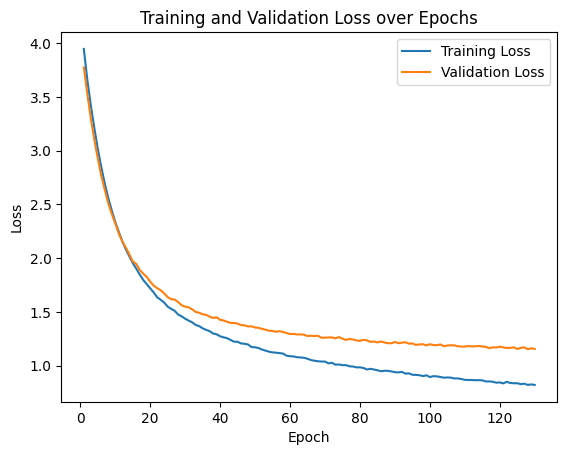

In [18]:
import matplotlib.pyplot as plt

n_epochs = 130
train_losses = []
val_losses = []

for epoch in range(n_epochs):
    model.train()
    train_loss, val_loss = 0, 0
    for images, labels in tqdm(train_loader):
        if gpu:
            images, labels = images.cuda(), labels.cuda()
        optimizer.zero_grad()
        pred = model(images) 
        loss = cross_entropy(pred, labels)
        loss.backward() 
        optimizer.step() 
        train_loss += loss.item() * images.size(0)

    train_loss /= n_train  # Average the training loss over the entire dataset
    train_losses.append(train_loss)

    model.eval() 
    for images, labels in tqdm(val_loader):
        if gpu:
            images, labels = images.cuda(), labels.cuda()
        pred = model(images)
        loss = cross_entropy(pred, labels)
        val_loss += loss.item() * images.size(0)
    
    val_loss /= n_val  # Average the validation loss over the entire dataset
    val_losses.append(val_loss)

    print("Epoch: {}, Training loss = {}, Validation loss = {}".format(epoch+1, train_loss, val_loss))


plt.plot(range(1, n_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, n_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()


In [23]:
# คำนวณหา classification report สำหรับ validation set
y_pred, y_true = [], []
model.eval() # เซ็ตเป็น evaluation mode
for images, labels in tqdm(val_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)
print(classification_report(y_true, y_pred))

100%|██████████| 51/51 [01:09<00:00,  1.36s/it]

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        30
           1       0.96      0.83      0.89        30
           2       0.53      0.53      0.53        30
           3       0.63      0.57      0.60        30
           4       0.91      0.70      0.79        30
           5       0.68      0.63      0.66        30
           6       0.62      0.70      0.66        30
           7       0.85      0.93      0.89        30
           8       0.69      0.90      0.78        30
           9       0.68      0.87      0.76        30
          10       0.75      0.86      0.80        28
          11       0.70      0.70      0.70        30
          12       0.69      0.73      0.71        30
          13       0.64      0.72      0.68        29
          14       0.88      0.77      0.82        30
          15       0.65      0.50      0.57        30
          16       0.83      0.83      0.83        30
          17       0.69    

In [20]:
print("Accuracy on validation set = {}".format(
    accuracy_score(y_true, y_pred))
)

Accuracy on validation set = 0.7026022304832714


In [22]:
torch.save(model.state_dict(), 'Finalmodel.pth')

'train'

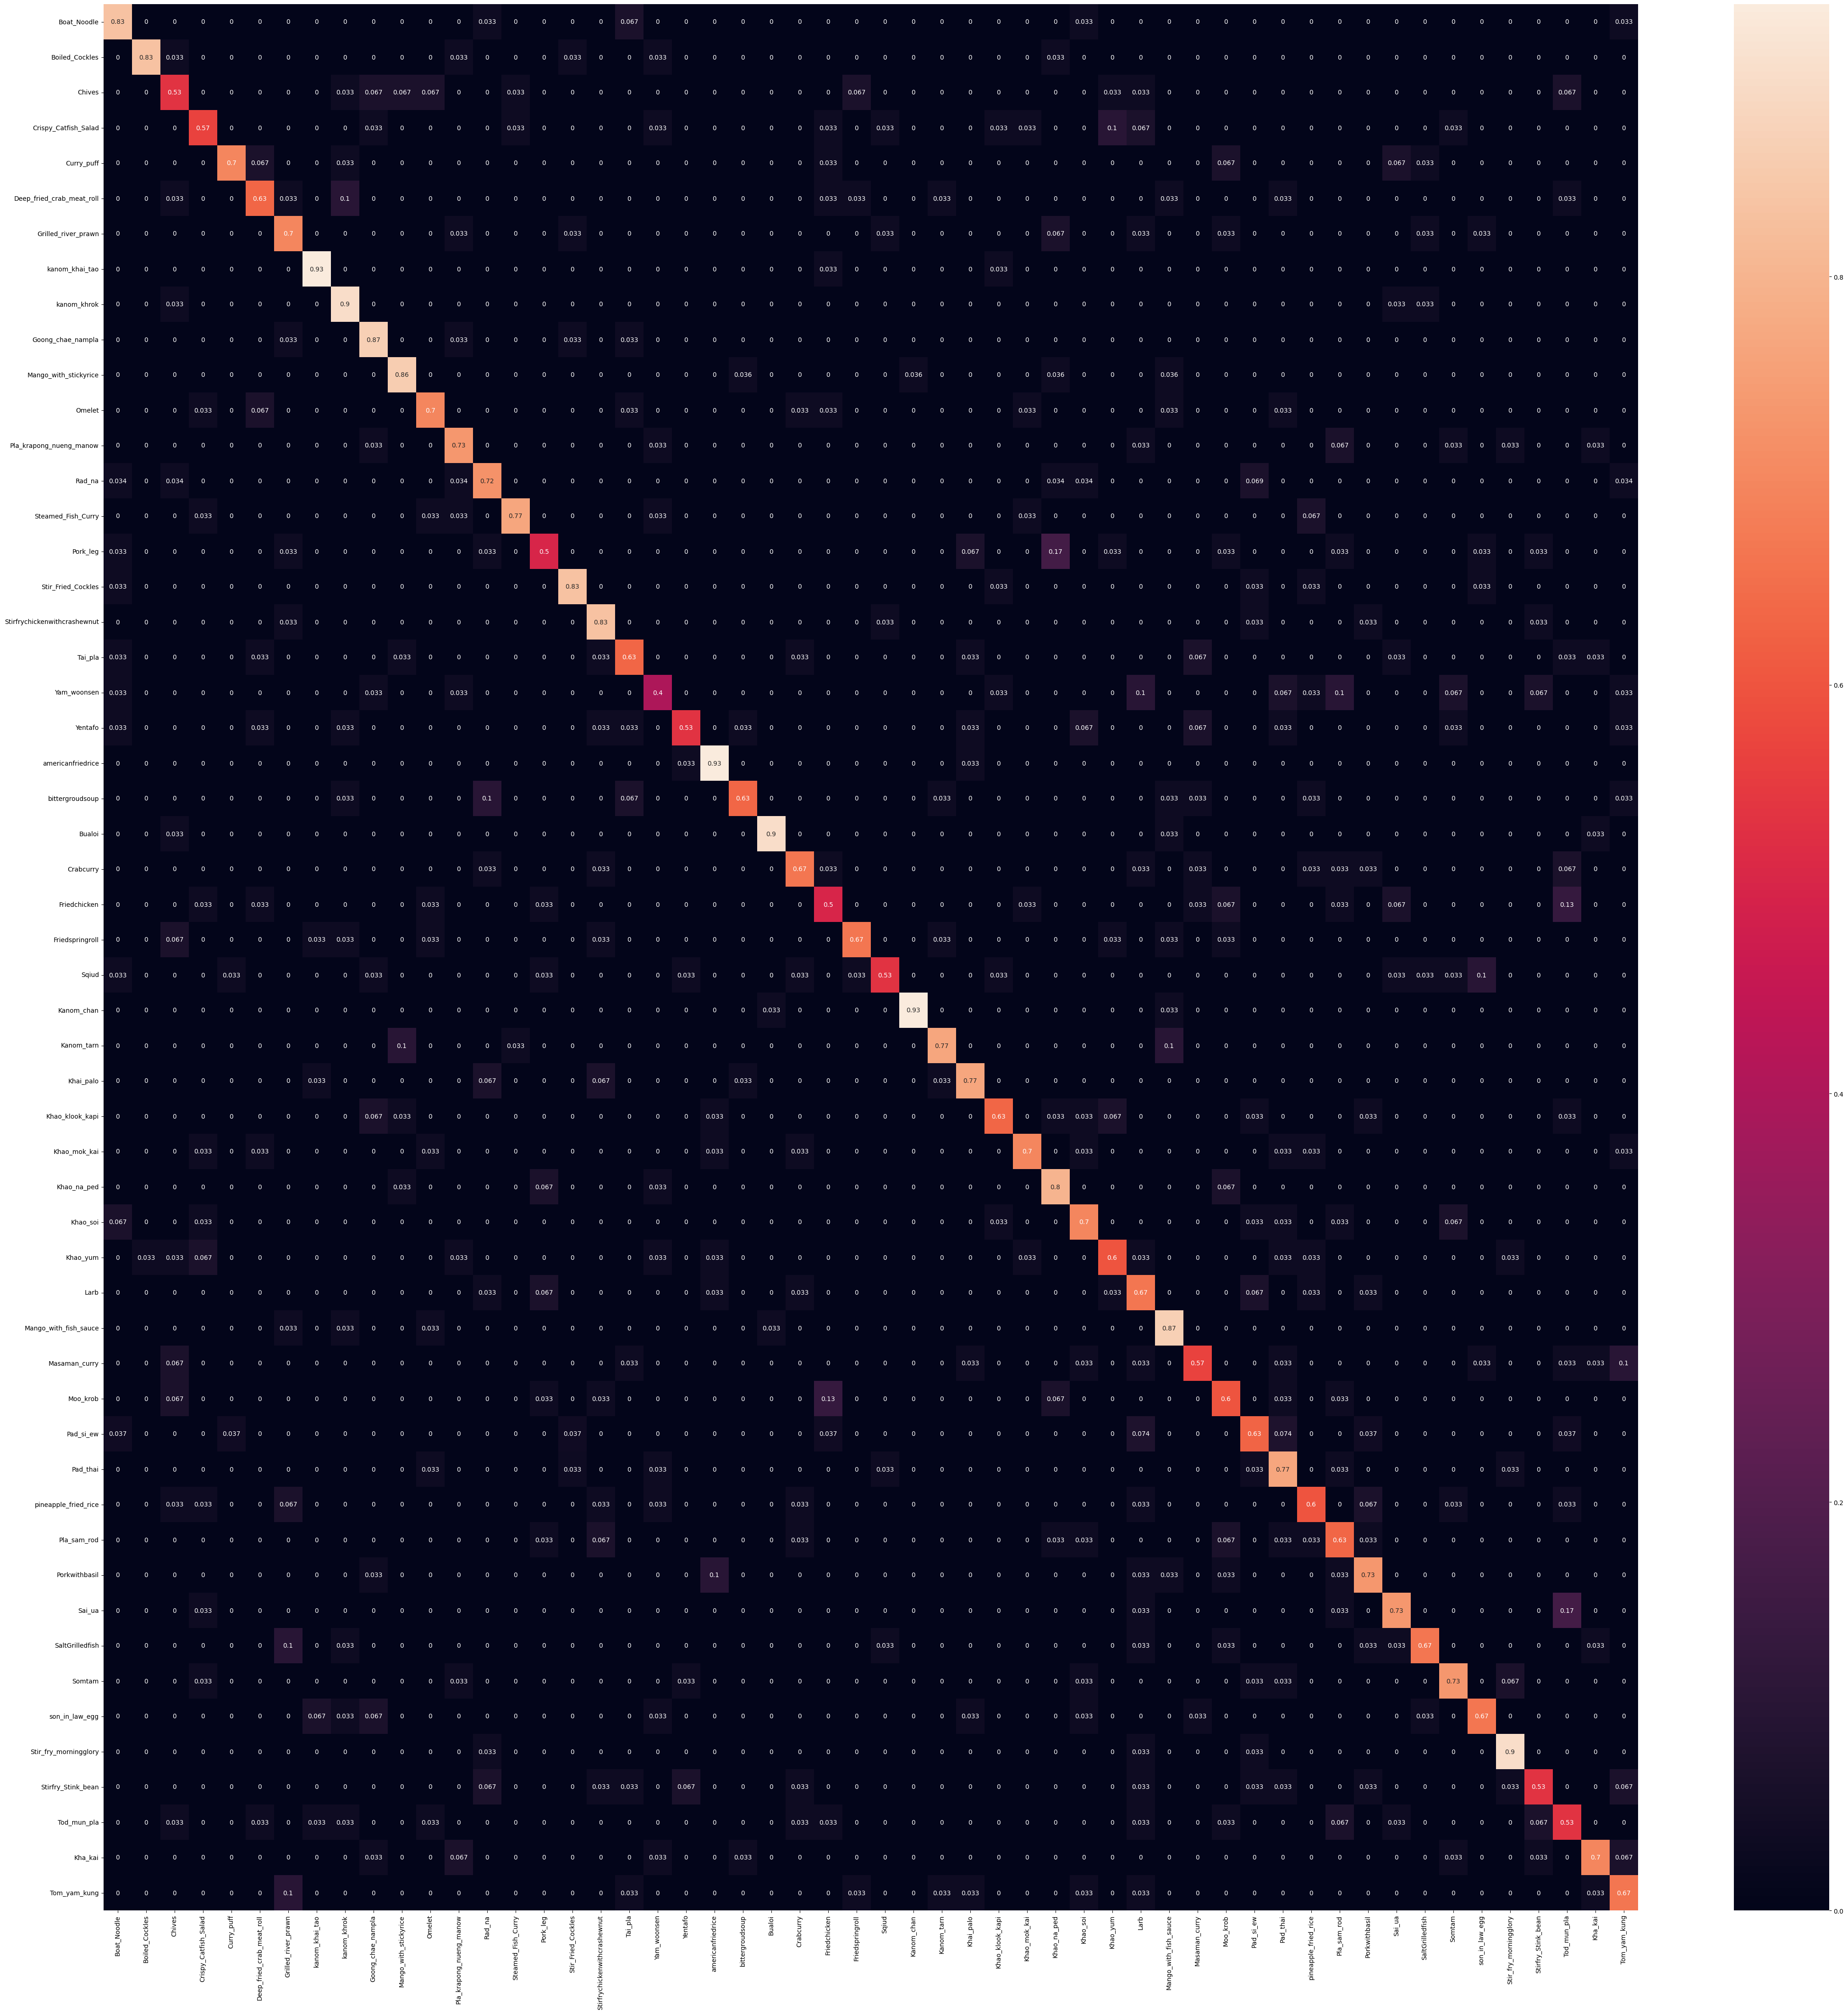

In [21]:
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix
y_pred = []
y_true = []

# iterate over test data
for inputs, labels in val_loader:
    if gpu:
        inputs, labels = inputs.cuda(), labels.cuda()
    
    output = model(inputs) # Feed Network
    output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
    y_pred.extend(output) # Save Prediction
        
    labels = labels.data.cpu().numpy()
    y_true.extend(labels) # Save Truth

# constant for classes
classes =  ("Boat_Noodle",
    "Boiled_Cockles",
    "Chives",
    "Crispy_Catfish_Salad",
    "Curry_puff",
    "Deep_fried_crab_meat_roll",
    "Grilled_river_prawn",
    "kanom_khai_tao",
    "kanom_khrok",
    "Goong_chae_nampla",
    "Mango_with_stickyrice",
    "Omelet",
    "Pla_krapong_nueng_manow",
    "Rad_na",
    "Steamed_Fish_Curry",
    "Pork_leg",
    "Stir_Fried_Cockles",
    "Stirfrychickenwithcrashewnut",
    "Tai_pla",
    "Yam_woonsen",
    "Yentafo",
    "americanfriedrice",
    "bittergroudsoup",
    "Bualoi",
    "Crabcurry",
    "Friedchicken",
    "Friedspringroll",
    "Sqiud",
    "Kanom_chan",
    "Kanom_tarn",
    "Khai_palo",
    "Khao_klook_kapi",
    "Khao_mok_kai",
    "Khao_na_ped",
    "Khao_soi",
    "Khao_yum",
    "Larb",
    "Mango_with_fish_sauce",
    "Masaman_curry",
    "Moo_krob",
    "Pad_si_ew",
    "Pad_thai",
    "pineapple_fried_rice",
    "Pla_sam_rod",
    "Porkwithbasil",
    "Sai_ua",
    "SaltGrilledfish",
    "Somtam",
    "son_in_law_egg",
    "Stir_fry_morningglory",
    "Stirfry_Stink_bean",
    "Tod_mun_pla",
    "Kha_kai",
    "Tom_yam_kung")
# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index=[i for i in classes],
                     columns=[i for i in classes])
plt.figure(figsize=(54, 54))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')